<a href="https://colab.research.google.com/github/shrutileena/Practice_Python/blob/master/Diabetes_dataset_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [336]:
#import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [337]:
columns_to_named = ["Pregnancies","Glucose","BloodPressure",
           "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",
           "Age","Class"]

df = pd.read_csv("pima-indians-diabetes.csv",header=0,names=columns_to_named)

In [338]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [339]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [340]:
y = df['Class']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Class, dtype: int64

In [341]:
df_new = df.drop(['Class'], axis = 1)
x = df_new.values

In [342]:
x

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 2.81e+01, 1.67e-01, 2.10e+01],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [343]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y, test_size=0.2,random_state=101)

In [344]:
X_Train.shape

(613, 8)

In [345]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Using ADAM

In [346]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [347]:
history = model.fit(X_Train, Y_Train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 3ms/step - loss: 4.6320 - accuracy: 0.6313
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 1.6955 - accuracy: 0.6003
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 1.2204 - accuracy: 0.6036
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.6036
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 1.0049 - accuracy: 0.6346
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.8384 - accuracy: 0.6525
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7687 - accuracy: 0.6639
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7469 - accuracy: 0.6558
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.6721
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.6721
Epoch 11/

In [348]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [349]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7132
Accuracy: 71.32


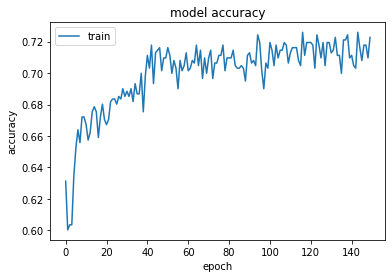

In [350]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

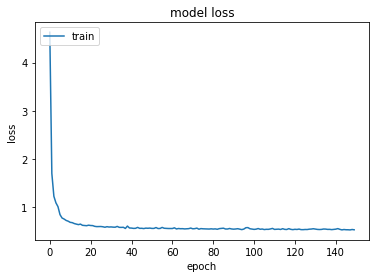

In [351]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [353]:
history1 = model.fit(X_Test, Y_Test, epochs=150, batch_size=10)

Epoch 1/150
16/16 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.6753
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.6948
Epoch 3/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.6883
Epoch 4/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.6883
Epoch 5/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.6688
Epoch 6/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.6883
Epoch 7/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7208
Epoch 8/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7078
Epoch 9/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7013
Epoch 10/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7078
Epoch 11/

In [354]:
_, accuracy = model.evaluate(X_Test, Y_Test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7532
Accuracy: 75.32


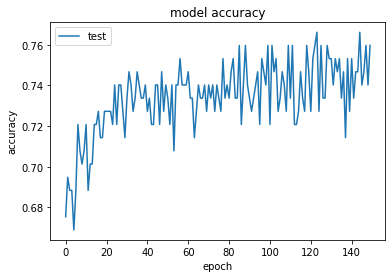

In [355]:
plt.plot(history1.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

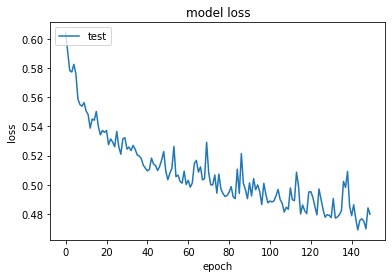

In [357]:
plt.plot(history1.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

Using Adamax

In [358]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [359]:
history = model.fit(X_Train, Y_Train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6852
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.6803
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.6852
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.6884
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.6949
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.6868
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.6917
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.6917
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.6900
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.6966
Epoch 11/

In [360]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [361]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7106
Accuracy: 71.06


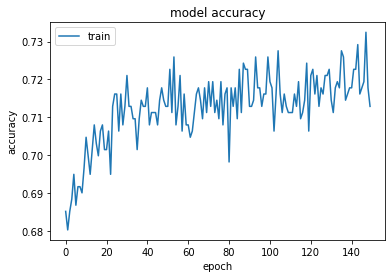

In [364]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

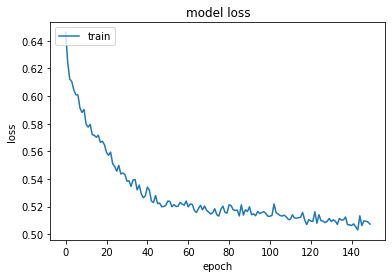

In [365]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [366]:
history1 = model.fit(X_Test, Y_Test, epochs=150, batch_size=10)

Epoch 1/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7013
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7013
Epoch 3/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7013
Epoch 4/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7013
Epoch 5/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.7013
Epoch 6/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7078
Epoch 7/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7078
Epoch 8/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.6948
Epoch 9/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7208
Epoch 10/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7143
Epoch 11/

In [367]:
_, accuracy = model.evaluate(X_Test, Y_Test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.7532
Accuracy: 75.32


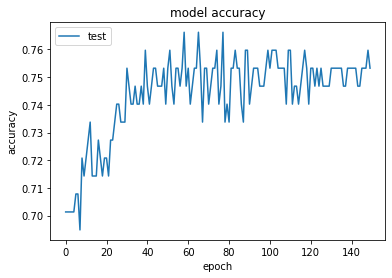

In [368]:
plt.plot(history1.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

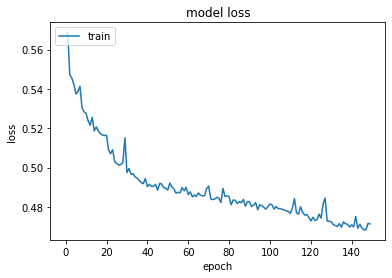

In [369]:
plt.plot(history1.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Using SGD

In [370]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [371]:
model.fit(X_Train, Y_Train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 3ms/step - loss: 0.8058 - accuracy: 0.6411
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6574
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6558
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6542
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6542
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6558
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.6542
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.6558
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6558
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.6558
Epoch 11/

In [372]:
_, accuracy = model.evaluate(X_Train, Y_Train)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.6966
Accuracy: 69.66


In [373]:
_, accuracy = model.evaluate(X_Test, Y_Test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.6883
Accuracy: 68.83


Using RMSprop

In [374]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [375]:
model.fit(X_Train, Y_Train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.6966
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7015
Epoch 3/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5472 - accuracy: 0.7015
Epoch 4/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5483 - accuracy: 0.6998
Epoch 5/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5495 - accuracy: 0.7113
Epoch 6/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.7064
Epoch 7/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.7129
Epoch 8/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5479 - accuracy: 0.7047
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7031
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.7129
Epoch 11/

In [376]:
_, accuracy = model.evaluate(X_Train, Y_Train)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7259
Accuracy: 72.59


In [377]:
_, accuracy = model.evaluate(X_Test, Y_Test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6429
Accuracy: 64.29
